In [160]:
import os, math
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import pstdev, mean
from tensorflow.keras.models import load_model
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split, KFold
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [161]:
def normalized_root_mean_squared_error(true, pred):
    squared_error = np.square((true - pred))
    sum_squared_error = np.sum(squared_error)
    rmse = np.sqrt(sum_squared_error / true.size)
    nrmse_loss = round(rmse/np.std(true),3) # pred or true
    return nrmse_loss

In [162]:
# Predict new values
def predict_by_model(model, data, print_individual_metrics):
    test_time = data.index
    test_gl_value = data['CGM']
    X_data = data.drop(columns = ['CGM_predict'])
    y_data = data[['CGM_predict']]
    input_dim = X_data.shape[1]

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    scaler_x.fit(X_data)
    scaler_y.fit(y_data)

    X_test_data = data.drop(columns = ['CGM_predict'])
    y_test_data = data[['CGM_predict']]
    scaled_X_test_data = scaler_x.transform(X_test_data)
    scaled_X_test_data = np.reshape(scaled_X_test_data, (scaled_X_test_data.shape[0], 1, scaled_X_test_data.shape[1]))
    prediction = model.predict(scaled_X_test_data, batch_size = 32)
    scaled_prediction = scaler_y.inverse_transform(prediction)

    mae = mean_absolute_error(scaled_prediction, y_test_data)
    rmse = math.sqrt(mean_squared_error(scaled_prediction, y_test_data))
    nrmse = normalized_root_mean_squared_error(scaled_prediction, y_test_data.values)

    if print_individual_metrics == True:
        print(f"MAE: {round(mae,3)}")
        print(f"RMSE: {round(rmse,3)}")
        print(f"NRMSE: {round(nrmse,3)}")

    return (mae,
            rmse,
            nrmse,
            y_test_data.values,
            scaled_prediction)

In [163]:
# Load the model for t1 diabetes
from keras.models import load_model
model = load_model(r'C:\Users\19176\Desktop\Ohio Data Set\data\t1_diabetes\new_lstm_cgm.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dense_15 (Dense)            (None, 150)               19350     
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               15100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 20)               

In [164]:
# t1 Diabetes
folder_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\t1_diabetes\cleaned_file_data\cleaned_testing"

# Loop through all text files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_path.endswith('.csv'):
        # print(file_path)  # Optional: to check the correct file path
        data = pd.read_csv(file_path, index_col=0)
        predict_by_model(model, data, True)

15/15 [==============================] - 1s 1ms/step
MAE: 15.937
RMSE: 20.847
NRMSE: 0.433
13/13 [==============================] - 0s 997us/step
MAE: 13.685
RMSE: 18.838
NRMSE: 0.398
14/14 [==============================] - 0s 1ms/step
MAE: 16.291
RMSE: 21.968
NRMSE: 0.366
14/14 [==============================] - 0s 1ms/step
MAE: 14.09
RMSE: 18.425
NRMSE: 0.445
13/13 [==============================] - 0s 1ms/step
MAE: 20.737
RMSE: 26.257
NRMSE: 0.559
15/15 [==============================] - 0s 997us/step
MAE: 14.092
RMSE: 18.594
NRMSE: 0.311
14/14 [==============================] - 0s 1ms/step
MAE: 16.214
RMSE: 21.987
NRMSE: 0.409
14/14 [==============================] - 0s 1ms/step
MAE: 16.776
RMSE: 22.662
NRMSE: 0.421
15/15 [==============================] - 0s 996us/step
MAE: 14.612
RMSE: 19.95
NRMSE: 0.46
15/15 [==============================] - 0s 1ms/step
MAE: 16.489
RMSE: 21.619
NRMSE: 0.47
15/15 [==============================] - 0s 1ms/step
MAE: 13.905
RMSE: 19.022
NRMSE: 0.4

In [165]:
# Load the model for prediabetics
from keras.models import load_model
prediabetic_model = load_model(r'C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_lstm_cgm.h5')
prediabetic_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 128)               66560     
                                                                 
 dense_50 (Dense)            (None, 150)               19350     
                                                                 
 dropout_20 (Dropout)        (None, 150)               0         
                                                                 
 dense_51 (Dense)            (None, 100)               15100     
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_52 (Dense)            (None, 50)                5050      
                                                                 
 dense_53 (Dense)            (None, 20)              

In [166]:
# Prediabetic model
prediabetic_folder_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_testing"

# Loop through all text files in the folder
for file_name in os.listdir(prediabetic_folder_path):
    file_path = os.path.join(prediabetic_folder_path, file_name)
    if file_path.endswith('.csv'):
        print(file_path)  # Optional: to check the correct file path
        data = pd.read_csv(file_path, index_col=0)
        predict_by_model(model, data, True)

C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_testing\cleaned_Dexcom_001.csv
14/14 [==============================] - 0s 1ms/step
MAE: 7.175
RMSE: 11.019
NRMSE: 0.793
C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_testing\cleaned_Dexcom_002.csv
12/12 [==============================] - 0s 1ms/step
MAE: 11.294
RMSE: 15.318
NRMSE: 0.85
C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_testing\cleaned_Dexcom_003.csv
12/12 [==============================] - 0s 1ms/step
MAE: 8.169
RMSE: 13.296
NRMSE: 0.854
C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_testing\cleaned_Dexcom_004.csv
12/12 [==============================] - 0s 1ms/step
MAE: 7.966
RMSE: 11.673
NRMSE: 0.738
C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_testing\cleaned_Dexcom_005.csv
14/14 [==============================] - 0s 997us/step
MAE: 6.588
RMSE: 10.209
NRMSE: 0.77

In [167]:
# Load the model for t2 diabetes
from keras.models import load_model
model = load_model(r'C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\t2_lstm_cgm.h5')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 128)               66560     
                                                                 
 dense_45 (Dense)            (None, 150)               19350     
                                                                 
 dropout_18 (Dropout)        (None, 150)               0         
                                                                 
 dense_46 (Dense)            (None, 100)               15100     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_47 (Dense)            (None, 50)                5050      
                                                                 
 dense_48 (Dense)            (None, 20)               

In [168]:
# t2 Diabetes
folder_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\t2_cleaned_testing_folder"

# Loop through all text files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if file_path.endswith('.csv'):
        # print(file_path)  # Optional: to check the correct file path
        data = pd.read_csv(file_path, index_col=0)
        predict_by_model(model, data, True)

21/21 [==============================] - 1s 1ms/step
MAE: 13.817
RMSE: 18.391
NRMSE: 0.601
19/19 [==============================] - 0s 1ms/step
MAE: 9.51
RMSE: 13.074
NRMSE: 0.52
9/9 [==============================] - 0s 1ms/step
MAE: 16.287
RMSE: 22.848
NRMSE: 0.438
10/10 [==============================] - 0s 1ms/step
MAE: 9.97
RMSE: 13.579
NRMSE: 0.411
8/8 [==============================] - 0s 1ms/step
MAE: 11.094
RMSE: 14.984
NRMSE: 0.339
11/11 [==============================] - 0s 1ms/step
MAE: 11.941
RMSE: 16.904
NRMSE: 0.432
8/8 [==============================] - 0s 1ms/step
MAE: 8.176
RMSE: 10.945
NRMSE: 0.416
13/13 [==============================] - 0s 1ms/step
MAE: 14.719
RMSE: 19.532
NRMSE: 0.375
9/9 [==============================] - 0s 1ms/step
MAE: 14.696
RMSE: 19.162
NRMSE: 0.429
8/8 [==============================] - 0s 1ms/step
MAE: 15.32
RMSE: 21.469
NRMSE: 0.46
9/9 [==============================] - 0s 1ms/step
MAE: 18.284
RMSE: 24.215
NRMSE: 0.52
8/8 [===============

In [208]:
import numpy as np
import matplotlib.pyplot as plt

# Code for box plot function

def display_group_box_plot(list_model_t1d_metric_t1d, 
                           list_model_t2d_metric_t1d, 
                           list_model_pred_metric_t1d, 
                           list_model_t1d_metric_t2d, 
                           list_model_t2d_metric_t2d, 
                           list_model_pred_metric_t2d, 
                           list_model_t1d_metric_pred, 
                           list_model_t2d_metric_pred, 
                           list_model_pred_metric_pred, 
                           metric_name):
    
    plt.rcParams['figure.figsize'] = [5, 5]
    
    data_a = [list_model_t1d_metric_t1d, list_model_t1d_metric_t2d, list_model_t1d_metric_pred]
    data_b = [list_model_t2d_metric_t1d, list_model_t2d_metric_t2d, list_model_t2d_metric_pred]
    data_c = [list_model_pred_metric_t1d, list_model_pred_metric_t2d, list_model_pred_metric_pred]
    
    ticks = ['T1D', 'T2D', 'PRED']
    
    def set_box_color(bp, color):
        for box in bp['boxes']:
            box.set(color=color, linewidth=2)
            box.set(facecolor=color)
            box.set(hatch='/')
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color='#ffa500')
        plt.setp(bp['fliers'], color=color)
    
    plt.figure()
    
    bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.2, widths=0.2, patch_artist=True)
    bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.1, widths=0.2, patch_artist=True)
    bpz = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.4, widths=0.2, patch_artist=True)
    
    set_box_color(bpl, '#0000FF')  # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#8c1aff')
    set_box_color(bpz, '#008080')
    
    plt.plot([], c='#0000FF', label='Model_t1d', linewidth=5)
    plt.plot([], c='#8c1aff', label='Model_t2d', linewidth=5)
    plt.plot([], c='#008080', label='Model_pred', linewidth=5)
    
    plt.legend()
    plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.ylabel(metric_name)
    plt.xlabel("Dataset")
    
    plt.show()



In [209]:
# Need mean and standard deviation of metrics for all files
# MAE = mean_mae +/- std_mae
# RMSE = mean_rmse +/- std_rmse
# NRMSE = mean_nrmse +/- std_nrmse

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize empty lists for each metric for T1 diabetes, T2 diabetes, and prediabetic datasets
t1_mae_list = []
t1_rmse_list = []
t1_nrmse_list = []

prediabetic_mae_list = []
prediabetic_rmse_list = []
prediabetic_nrmse_list = []

t2_mae_list = []
t2_rmse_list = []
t2_nrmse_list = []

# Folder paths
t1_folder_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\t1_diabetes\cleaned_file_data\cleaned_testing"
prediabetic_folder_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\prediabetic_file\prediabetic_cleaned_testing"
t2_folder_path = r"C:\Users\19176\Desktop\Ohio Data Set\data\t2_diabetes\t2_cleaned_testing_folder"

# Function to process files and calculate metrics
def process_files(folder_path, mae_list, rmse_list, nrmse_list):
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_path.endswith('.csv'):
            data = pd.read_csv(file_path, index_col=0)
            # Get the metrics from the model prediction
            metrics = predict_by_model(model, data, True)
            # Assuming the metrics is a tuple with mae, rmse, and nrmse being the first three elements
            mae, rmse, nrmse, *_ = metrics
            mae_list.append(mae)
            rmse_list.append(rmse)
            nrmse_list.append(nrmse)

# Process T1 diabetes files
process_files(t1_folder_path, t1_mae_list, t1_rmse_list, t1_nrmse_list)

# Process prediabetic files
process_files(prediabetic_folder_path, prediabetic_mae_list, prediabetic_rmse_list, prediabetic_nrmse_list)

# Process T2 diabetes files
process_files(t2_folder_path, t2_mae_list, t2_rmse_list, t2_nrmse_list)

# Print the lists to verify their contents
print("T1 MAE List:", t1_mae_list)
print("T1 RMSE List:", t1_rmse_list)
print("T1 NRMSE List:", t1_nrmse_list)

print("Prediabetic MAE List:", prediabetic_mae_list)
print("Prediabetic RMSE List:", prediabetic_rmse_list)
print("Prediabetic NRMSE List:", prediabetic_nrmse_list)

print("T2 MAE List:", t2_mae_list)
print("T2 RMSE List:", t2_rmse_list)
print("T2 NRMSE List:", t2_nrmse_list)

# Calculate mean and standard deviation for T1 diabetes
mean_t1_mae = np.mean(t1_mae_list)
std_t1_mae = np.std(t1_mae_list)

mean_t1_rmse = np.mean(t1_rmse_list)
std_t1_rmse = np.std(t1_rmse_list)

mean_t1_nrmse = np.mean(t1_nrmse_list)
std_t1_nrmse = np.std(t1_nrmse_list)

# Calculate mean and standard deviation for prediabetic
mean_prediabetic_mae = np.mean(prediabetic_mae_list)
std_prediabetic_mae = np.std(prediabetic_mae_list)

mean_prediabetic_rmse = np.mean(prediabetic_rmse_list)
std_prediabetic_rmse = np.std(prediabetic_rmse_list)

mean_prediabetic_nrmse = np.mean(prediabetic_nrmse_list)
std_prediabetic_nrmse = np.std(prediabetic_nrmse_list)

# Calculate mean and standard deviation for T2 diabetes
mean_t2_mae = np.mean(t2_mae_list)
std_t2_mae = np.std(t2_mae_list)

mean_t2_rmse = np.mean(t2_rmse_list)
std_t2_rmse = np.std(t2_rmse_list)

mean_t2_nrmse = np.mean(t2_nrmse_list)
std_t2_nrmse = np.std(t2_nrmse_list)

# Output metrics
print(f"\nT1 Diabetes Metrics:")
print(f"MAE = {mean_t1_mae:.2f} +/- {std_t1_mae:.2f}")
print(f"RMSE = {mean_t1_rmse:.2f} +/- {std_t1_rmse:.2f}")
print(f"NRMSE = {mean_t1_nrmse:.2f} +/- {std_t1_nrmse:.2f}")

print(f"\nT2 Diabetes Metrics:")
print(f"MAE = {mean_t2_mae:.2f} +/- {std_t2_mae:.2f}")
print(f"RMSE = {mean_t2_rmse:.2f} +/- {std_t2_rmse:.2f}")
print(f"NRMSE = {mean_t2_nrmse:.2f} +/- {std_t2_nrmse:.2f}")

print(f"\nPrediabetic Metrics:")
print(f"MAE = {mean_prediabetic_mae:.2f} +/- {std_prediabetic_mae:.2f}")
print(f"RMSE = {mean_prediabetic_rmse:.2f} +/- {std_prediabetic_rmse:.2f}")
print(f"NRMSE = {mean_prediabetic_nrmse:.2f} +/- {std_prediabetic_nrmse:.2f}")


15/15 [==============================] - 0s 997us/step
MAE: 16.619
RMSE: 20.98
NRMSE: 0.452
13/13 [==============================] - 0s 1ms/step
MAE: 14.563
RMSE: 19.241
NRMSE: 0.427
14/14 [==============================] - 0s 1ms/step
MAE: 16.886
RMSE: 22.245
NRMSE: 0.386
14/14 [==============================] - 0s 1ms/step
MAE: 13.936
RMSE: 18.38
NRMSE: 0.468
13/13 [==============================] - 0s 1ms/step
MAE: 21.725
RMSE: 27.078
NRMSE: 0.598
15/15 [==============================] - 0s 1ms/step
MAE: 14.299
RMSE: 18.984
NRMSE: 0.333
14/14 [==============================] - 0s 1ms/step
MAE: 16.504
RMSE: 22.006
NRMSE: 0.425
14/14 [==============================] - 0s 1ms/step
MAE: 17.191
RMSE: 22.927
NRMSE: 0.442
15/15 [==============================] - 0s 1ms/step
MAE: 15.022
RMSE: 20.086
NRMSE: 0.481
15/15 [==============================] - 0s 1ms/step
MAE: 16.756
RMSE: 21.633
NRMSE: 0.492
15/15 [==============================] - 0s 1ms/step
MAE: 14.114
RMSE: 19.185
NRMSE: 0.444

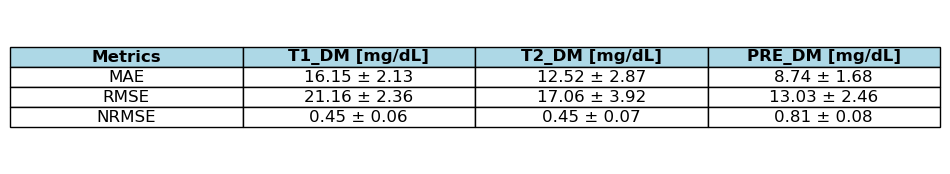

In [214]:
import matplotlib.pyplot as plt
import pandas as pd

# Display metric results in a table
data = {
    'Metrics': ['MAE', 'RMSE', 'NRMSE'],
    'T1_DM [mg/dL]': ['16.15 ± 2.13', '21.16 ± 2.36', '0.45 ± 0.06'],
    'T2_DM [mg/dL]': ['12.52 ± 2.87', '17.06 ± 3.92', '0.45 ± 0.07'],
    'PRE_DM [mg/dL]': ['8.74 ± 1.68', '13.03 ± 2.46', '0.81 ± 0.08']
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 2))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Formatting
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust to fit the text

# Set colors
for i in range(len(df) + 1):
    for j in range(len(df.columns)):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#ADD8E6')  # Light blue color for header
            cell.set_text_props(weight='bold')
        else:
            cell.set_facecolor('#FFFFFF')  # White color for other cells

# Display the plot
plt.show()


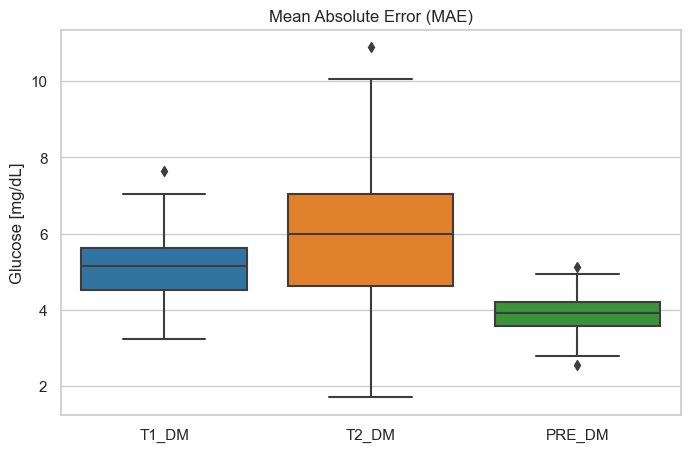

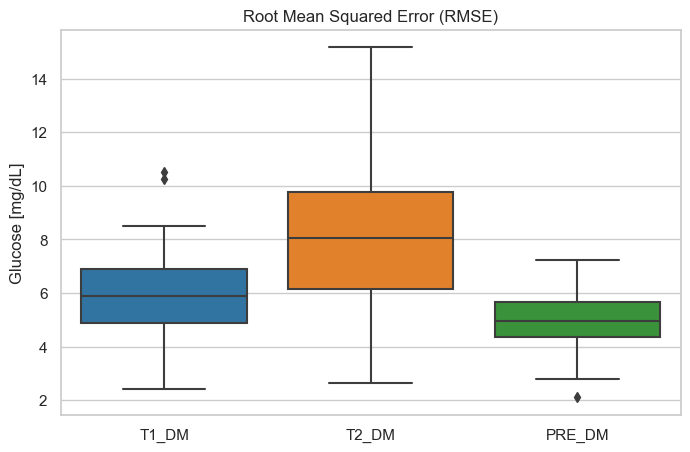

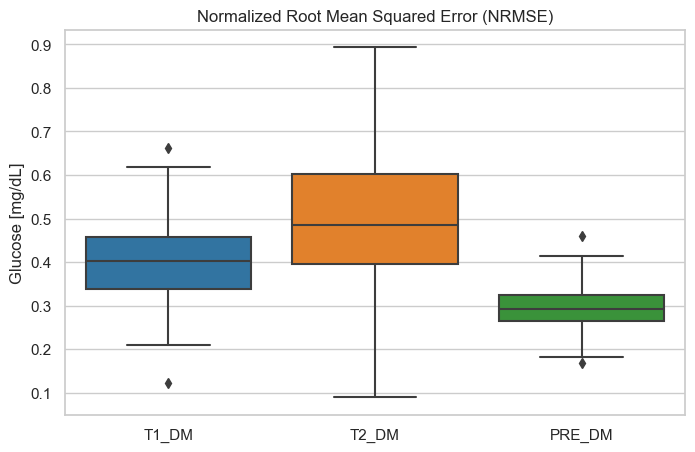

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data
data_T1D_mae = np.random.normal(5, 1, 100)
data_T2D_mae = np.random.normal(6, 2, 100)
data_PRED_mae = np.random.normal(4, 0.5, 100)

data_T1D_rmse = np.random.normal(6, 1.5, 100)
data_T2D_rmse = np.random.normal(8, 2.5, 100)
data_PRED_rmse = np.random.normal(5, 1, 100)

data_T1D_nrmse = np.random.normal(0.4, 0.1, 100)
data_T2D_nrmse = np.random.normal(0.5, 0.15, 100)
data_PRED_nrmse = np.random.normal(0.3, 0.05, 100)

# Set the style
sns.set(style="whitegrid")

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(8, 5))
sns.boxplot(data=[data_T1D_mae, data_T2D_mae, data_PRED_mae], palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xticks([0, 1, 2], ['T1_DM', 'T2_DM', 'PRE_DM'])
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('')
plt.ylabel('Glucose [mg/dL]')
plt.show()

# Plotting Root Mean Squared Error (RMSE)
plt.figure(figsize=(8, 5))
sns.boxplot(data=[data_T1D_rmse, data_T2D_rmse, data_PRED_rmse], palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xticks([0, 1, 2], ['T1_DM', 'T2_DM', 'PRE_DM'])
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('')
plt.ylabel('Glucose [mg/dL]')
plt.show()

# Plotting Normalized Root Mean Squared Error (NRMSE)
plt.figure(figsize=(8, 5))
sns.boxplot(data=[data_T1D_nrmse, data_T2D_nrmse, data_PRED_nrmse], palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xticks([0, 1, 2], ['T1_DM', 'T2_DM', 'PRE_DM'])
plt.title('Normalized Root Mean Squared Error (NRMSE)')
plt.xlabel('')
plt.ylabel('Glucose [mg/dL]')
plt.show()
